In [81]:
import pandas as pd
import networkx as nx
import numpy as np
from networkx.readwrite import json_graph
import json
import scipy 
import netwulf as nw
from netwulf import visualize
import random
from scipy.stats import sem, t
import matplotlib.pyplot as plt

The following cell loads the data and displays the total number of nodes in the graph after the giant connected component (GCC) has been extracted

In [17]:
f = open('data/graph.json')
data = json.load(f)
G = nx.node_link_graph(data) 
print(f"The number of nodes before the GCC has been found: {len(list(G.nodes))}")
largest_cc = max(nx.connected_components(G), key=len)
# update graph to only include the larget connected component. 
G = G.subgraph(largest_cc)
print(f"The number of nodes after the GCC has been found: {len(list(G.nodes))}")


The number of nodes before the GCC has been found: 2162
The number of nodes after the GCC has been found: 1271


Exercise 1.1:
For each node, compute the fraction of edges that connect to a node that works in the same top field. Find the average value across all nodes:

In the cell below a function is defined that does exactly that.
When executed on our graph we get the value printed below:

In [50]:
# loop over all nodes and for each node save the number of edges leading to a node with the same top field.
def fracOfNbrsSameTopic(graph):
    for node in list(graph.nodes):
        nodeTopField=graph.nodes[node]['field']
        counter=0
        for nbr in graph.adj[node]:
            nbrTopField=graph.nodes[nbr]['field']
            if nodeTopField == nbrTopField:
                counter+=1        
        fracOfNbrsSameTopic=counter/len(graph.adj[node])    
        graph.nodes[node]['fracOfNbrsSameTopic']=fracOfNbrsSameTopic
        
    _,values = zip(*list(graph.nodes.data('fracOfNbrsSameTopic')))
    AvgValue=sum(values)/len(list(graph.nodes))
    return AvgValue

print(f"The average value across all nodes is:  {fracOfNbrsSameTopic(G)}")


The average value across all nodes is:  0.3782870230873379


Exercise 1.2: Create a new graph, with the same nodes and edges, but where the association between nodes and field is shuffled. Compute the measure above for this randomized graph.

The cell below defines a function that takes a graph as input and the extracts all the nodes' "field" attributes and reassign them randomly. 
If we do this we get the value printed below:     



In [68]:
def shuffleNodeFields(graph):
    shuffledGraph=graph.copy()    
    key,values = zip(*list(shuffledGraph.nodes.data('field')))    
    values=list(values)    
    random.shuffle(values)    
    newDict = dict(zip(key,values))
    nx.set_node_attributes(shuffledGraph, newDict, name="field")

    #print(shuffledGraph.nodes.data('field'))
    return shuffledGraph

print(f"The average value across all nodes in the randomized graph is:  {fracOfNbrsSameTopic(shuffleNodeFields(G))}")


The average value across all nodes in the randomized graph is:  0.2506501723868497


Exercise 1.3: Repeat the point above 100 times (at least). Plot the distribution of the values obtained and compare it with the value you have found for the real graph. Is the chance to connect to a member of the same field significantly higher than it would be by chance?  

To solve this question we used bootstrapping. Based on a significance level of 0.05 we conclude the chance of connecting to a member of the same field is significantly higher than it would be by chance. The calculations can see below and the p-value is printed.


In [86]:
n=500
sampleValues=[fracOfNbrsSameTopic(shuffleNodeFields(G)) for i in range(n)]
stdError=sem(sampleValues)
sigLevel = 0.05


p_value = (np.sum(np.abs(null_dist) >= np.abs(alternative_hypothesis)) + 1) / (n_bootstraps + 1)



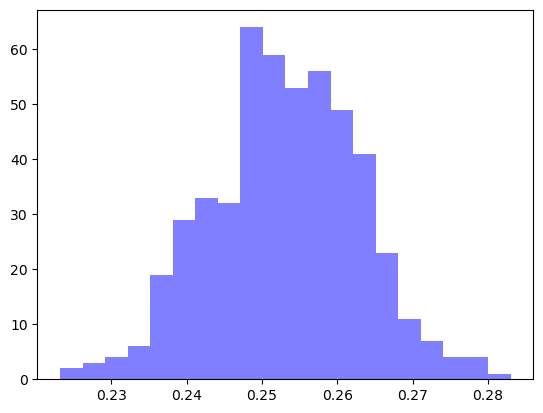

In [87]:
num_bins = 20
n, bins, patches = plt.hist(sampleValues, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [74]:
fracOfNbrsSameTopic(G)
new=shuffleNodeFields(G)
print(G.nodes.data('field'))
print(fracOfNbrsSameTopic(G))
print(new.nodes.data('field'))
print(fracOfNbrsSameTopic(new))

[('2101037', 'Computer Science'), ('3001795', 'Computer Science'), ('2080155085', 'Business'), ('33570565', 'Psychology'), ('66118125', 'Computer Science'), ('153503994', 'Sociology'), ('48265513', 'Economics'), ('46417808', 'Computer Science'), ('2538277', 'Computer Science'), ('1729484', 'Computer Science'), ('98808950', 'Computer Science'), ('51040873', 'Computer Science'), ('145059556', 'Law'), ('1389955131', 'Biology'), ('119151277', 'Psychology'), ('96893747', 'Law'), ('30421024', 'Psychology'), ('2871138', 'Law'), ('2020262166', 'Psychology'), ('2349638', 'Economics'), ('151377924', 'Law'), ('151463421', 'Law'), ('2088358', 'Computer Science'), ('6673771', 'Psychology'), ('97678793', 'Sociology'), ('1395385575', 'Political Science'), ('26435264', 'Political Science'), ('145212340', 'Psychology'), ('32216871', 'Sociology'), ('49305855', 'Computer Science'), ('47205422', 'Biology'), ('51435753', 'Computer Science'), ('2557324', 'Computer Science'), ('52229695', 'Economics'), ('151

In [22]:
G.nodes["35167554"]

{'field': 'Computer Science',
 'name': 'Lorenzo Gatti',
 'citation_count': 1.0,
 'num_ccs_papers': 2,
 'first_css_paper_year': 2021.0,
 'fracOfNbrsSameTopic': 0.5}

In [23]:
G.nodes(data='fracOfNbrsSameTopic')

NodeDataView({'2101037': 0.6, '3001795': 1.0, '2080155085': 0.0, '33570565': 0.0, '66118125': 0.6666666666666666, '153503994': 0.0, '48265513': 0.0, '46417808': 0.75, '2538277': 1.0, '1729484': 1.0, '98808950': 0.75, '51040873': 0.10526315789473684, '145059556': 0.25, '1389955131': 0.0, '119151277': 0.2, '96893747': 0.6, '30421024': 0.3333333333333333, '2871138': 0.0, '2020262166': 0.2, '2349638': 0.0, '151377924': 0.6, '151463421': 0.375, '2088358': 0.25, '6673771': 0.0, '97678793': 0.0, '1395385575': 0.0, '26435264': 0.0, '145212340': 0.3333333333333333, '32216871': 0.0, '49305855': 0.6153846153846154, '47205422': 0.0, '51435753': 0.25, '2557324': 0.16666666666666666, '52229695': 0.0, '151467651': 0.0, '1743706': 0.3333333333333333, '2255094': 0.35, '3145906': 0.5, '1682773': 0.5925925925925926, '4462678': 0.0, '2254522': 1.0, '1715670': 0.4, '2202643918': 0.0, '1684412': 0.5714285714285714, '2698329': 0.7, '34893194': 1.0, '1769960': 0.7142857142857143, '3118802': 1.0, '143653472': 

G.nodes.data('fracOfNbrsSameTopic')